<a href="https://colab.research.google.com/github/cr21/Behavior-of-Linear-Model-Machine-Learning-Study/blob/main/RegressionOutlierEffect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Study  Regression outlier effect.

<font face='georgia'> <h3> Objective:Visualization best fit linear regression line for different scenarios</h3> </font>

In [1]:
# you should not import any other packages
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from sklearn.linear_model import SGDRegressor

In [3]:
import numpy as np
import scipy as sp
import scipy.optimize

def angles_in_ellipse(num,a,b):
    assert(num > 0)
    assert(a < b)
    angles = 2 * np.pi * np.arange(num) / num
    # print("np.pi", np.pi)
    # print(" __",2*np.pi*np.arange(num)/num)
    if a != b:
        e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
        print("e",e)
        tot_size = sp.special.ellipeinc(2.0 * np.pi, e)
        arc_size = tot_size / num
        arcs = np.arange(num) * arc_size
        res = sp.optimize.root(
            lambda x: (sp.special.ellipeinc(x, e) - arcs), angles)
        angles = res.x 
    return angles

In [ ]:
# <!-- https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares -->

e 0.9749960430435691


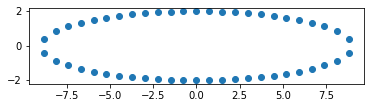

In [4]:
a = 2
b = 9
n = 50

phi = angles_in_ellipse(n, a, b)
e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
arcs = sp.special.ellipeinc(phi, e)

fig = plt.figure()
ax = fig.gca()
ax.axes.set_aspect('equal')
ax.scatter(b * np.sin(phi), a * np.cos(phi))
plt.show()

In [7]:
a = 2
b = 9
n = 50
def generateData(a=2,b=9,n=50):
  

  phi = angles_in_ellipse(n, a, b)
  e = (1.0 - a ** 2.0 / b ** 2.0) ** 0.5
  arcs = sp.special.ellipeinc(phi, e)
  X= b * np.sin(phi)
  Y= a * np.cos(phi)

  return X,Y 


def plot( customB, customW, regB,regW,a=2,b=9, n = 50):
  X,Y = generateData(a,b,n)
  fig = plt.figure()
  ax = fig.gca()
  ax.axes.set_aspect('equal')
  ax.scatter(b * np.sin(phi), a * np.cos(phi))
  ax.plot(X, customW*X+customB, color='orange', marker= "*")
  ax.plot(X, regW * X + regB ,color='green',marker='+')
  plt.title("Custom SGD regression fit line (Green line ) and sklearn SGD regression (Orange Line)")
  plt.show()


# plot(customB, customW, regB,regW,a=2,b=9, n = 50)

In [ ]:
X= b * np.sin(phi)
Y= a * np.cos(phi)


<font face='georgia'>
<i>
1. As a part of this assignment you will be working the regression problem and how regularization helps to get rid of outliers

2. Use the above created X, Y for this experiment.

3. to do this task you can either implement your own SGDRegression(prefered) excatly similar to "SGD assignment" with mean sequared error or 
you can use the SGDRegression of sklearn, for example "SGDRegressor(alpha=0.001, eta0=0.001, learning_rate='constant',random_state=0)" 
note that you have to use the constant learning rate and learning rate <b>eta0</b> initialized.

4. as a part of this experiment you will train your linear regression on the data (X, Y) with different regularizations alpha=[0.0001, 1, 100] and 
observe how prediction hyper plan moves with respect to the outliers

5. This the results of one of the experiment we did (title of the plot was not metioned intentionally) 
<img src='https://i.imgur.com/FctjBiD.png'> 
in each iteration we were adding single outlier and observed the movement of the hyper plane.

6. please consider this list of outliers: [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)] in each of tuple the first elemet 
is the input feature(X) and the second element is the output(Y)

7. for each regularizer, you need to add these outliers one at time to data and then train your model 
again on the updated data. 

8. you should plot a 3*5 grid of subplots,
 where each row corresponds to results of model with a single regularizer.

9. Algorithm: 

for each regularizer:
    for each outlier:
        #add the outlier to the data
        #fit the linear regression to the updated data
        #get the hyper plane
        #plot the hyperplane along with the data points

10. MAKE SURE YOU WRITE THE DETAILED OBSERVATIONS, PLEASE CHECK THE LOSS FUNCTION IN THE SKLEARN DOCUMENTATION
 (please do search for it).
</i>
</font>


In [8]:
class CustomSGDRegressor(object):
  """
  Custom Vanila implementation of SGD classfier with minimum detail

  """
  def __init__(self, loss ='squared_loss', penalty='l2',alpha=0.0001, learning_rate=0.01, eta0=0.01,tol=10e-4):
    self.loss = loss
    self.penalty = penalty
    self.alpha = alpha
    self.tol = tol
    self.learning_rate = learning_rate
    self.eta0 = eta0
    ranNum = np.random.rand(2,)
    self.b = ranNum[0]
    self.w = ranNum[1]
    self.lossVal = float("inf")


  def lossFunc(self,Y, y_pred):
    """
    get the Loss value
    
    """
   
    if self.loss == 'squared_loss' and self.penalty == 'l2':
      self.lossVal = np.mean(( Y - y_pred) ** 2) + self.alpha * np.mean(self.w**2)
      
    return self.lossVal


  def fit(self,X,Y):

    """
      Fit the line or hyperplane on X
    """

    
    maxIter = 100
    iter = 0
    prev_w = self.w
    prev_b = self.b
    while iter < maxIter:
      y_pred = (self.w * X + self.b)
      prevLoss = self.lossVal
      self.updateStep(Y, y_pred)
      newLoss = self.lossFunc(Y, y_pred)
      if newLoss > prevLoss - self.tol:
        break
      iter+=1

    return self.w,self.b, self.lossVal

  def updateStep(self,Y,y_pred):
    """
      Gradient Descent Update step 
      L2 Penalty used for regularization
    """
    grad_b = -2*np.mean( Y - y_pred) 
    self.b = self.b - self.eta0 * grad_b
    # regualarized with l2 penalty
    grad_w = -2 * np.mean(X *(Y - y_pred)) + 2* self.alpha * np.mean(self.w)
    # update
    self.w = self.w - self.eta0 * grad_w
    
    
    

  def score(self,X,Y):
    """
      Return the coefficient of determination  of the prediction (1 - SSR/SST)

    """
    y_pred = self.w * X + self.b
    SSR = ((Y - y_pred) ** 2).sum()

    SST = ((Y - Y.mean()) ** 2).sum()

    return 1 - (SSR/SST)
    pass


  def predict(self,X):
    """
    Predict the value of X

    """
    return self.w*X + self.b

In [ ]:
customReg = CustomSGDRegressor(alpha=0)
customW,customB,customLoss = customReg.fit(X,Y)


In [ ]:
reg = SGDRegressor()
reg.fit(X.reshape(-1,1),Y.reshape(-1,1))
regW = reg.coef_[0]
regB= reg.intercept_[0]

In [ ]:
reg_y_pred = reg.predict(X.reshape(-1,1))
regLoss = np.mean(( Y - reg_y_pred) ** 2) +  reg.alpha * np.mean(regW**2)


In [ ]:
print(f"Custom SGD with L2 regularization w : {customW} b : {customB} loss : {customLoss}")
print(f"Sklearn SGD with L2 regularization w : {regW} b : {regB} loss : {regLoss}")

Custom SGD with L2 regularization w : 0.0011080384182522987 b : 0.03585995251642107 loss : 2.5959086718080386
Sklearn SGD with L2 regularization w : -0.012513557041175882 b : -0.0039106505013655505 loss : 2.5988537730332526


## Effect of outliers on linear model with different alpha value(regularizer) 

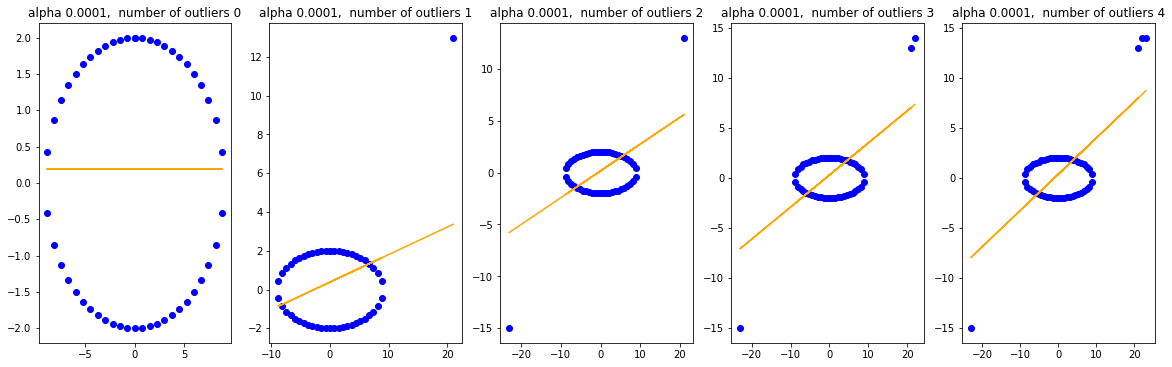

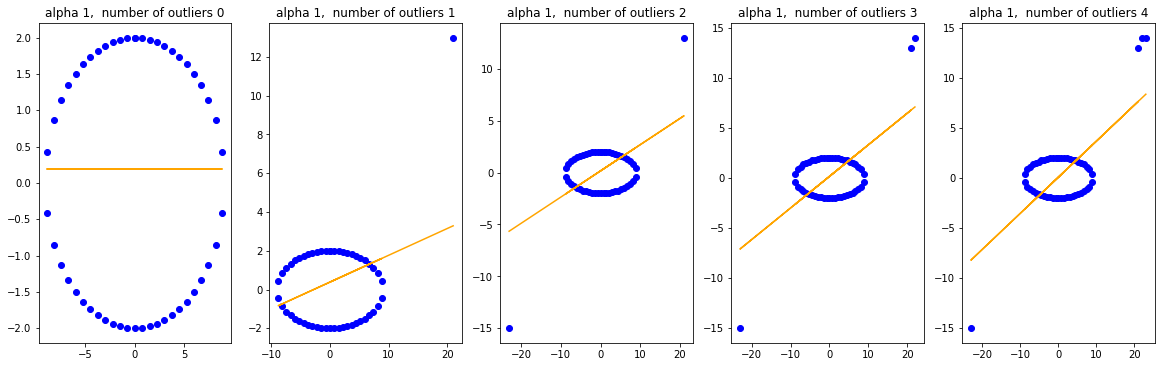

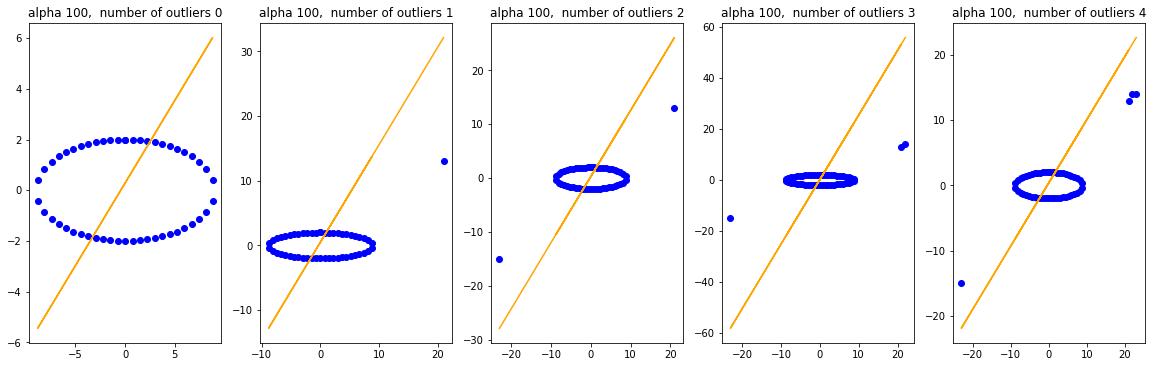

In [33]:
alphas = [0.0001,1,100]
outliers = [(0,2),(21, 13), (-23, -15), (22,14), (23, 14)]

for idx,alpha in enumerate(alphas) :
  plt.figure(figsize=(20,20))
  X= b * np.sin(phi)
  Y= a * np.cos(phi)
  for id,outlier in enumerate(outliers):
    plt.subplot(3,len(outliers),id+1)
    # add outlier one by one

    X = np.append(X,outlier[0]).reshape(-1,1)
    Y = np.append(Y,outlier[1]).reshape(-1,1)
    # run custom SGD regression
    customReg = CustomSGDRegressor(alpha=alpha)
    customW,customB,customLoss = customReg.fit(X,Y)
    # run sklern SGD
    sklearnSGD = SGDRegressor(alpha=alpha, learning_rate='constant')
    sklearnSGD.fit(X.reshape(-1,1),Y.reshape(-1,1))
    sklearnSGDW = sklearnSGD.coef_[0]
    sklearnSGDB= sklearnSGD.intercept_[0]
    
    customSGDLine = customW * X + customB
    sklearnSGDLine = sklearnSGDW * X + sklearnSGDB
    plt.scatter(X,Y, color='blue')
    plt.plot(X, customSGDLine, color='orange')
    plt.title(f"alpha {alpha},  number of outliers {id}")
    
  plt.show()
